# K-means

In this first exercise, you will __Apply K-means__ in a 2D dataset to help gain an intuition of how the algorithm works

## Generate & Plot Test Data

[`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) is an `sklearn` method that uses a Gaussian equation to generate separable datasets for clustering or classification.

👉Use it to generate a test dataset with 2 features (X, y) using the following parameters:
- 500 data points
- 4 classes (or clusters)
- `random_state`=42

Plot what your data looks like (it should be 4 distinct clusters of data).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=4,random_state=42)

In [3]:
X.shape, y.shape

((500, 2), (500,))

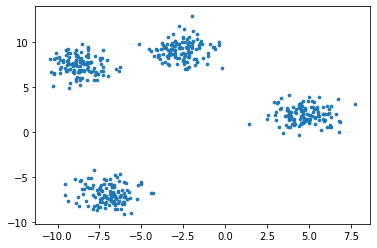

In [17]:
plt.scatter(X[:, 0], X[:, 1], s=7)
plt.show()

To summarize, 

1. You've created a fake dataset X, with no target at all (no supervision with a `y` vector).

2. This dataset has 500 observations, and 2 dimensions (or features), which are represented as two-dimensional positions on the plot you just made.

3. This dataset still has a structure, which is 4 clusters in our case with different centers (or `centroids`)

### 🧪 Test your code

In [18]:
from nbresult import ChallengeResult
import numpy as np

result = ChallengeResult('blobs', 
                         shape=X.shape, 
                         lower_centroid=X[np.logical_and(X[:,0] < -2.5, X[:,1] < -3)].mean(axis=0))
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/06-Unsupervised-Learning/01-Image-Compression
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_blobs.py::TestBlobs::test_lower_centroid PASSED               [ 50%]
tests/test_blobs.py::TestBlobs::test_shape PASSED                        [100%]

============================== 2 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/blobs.pickle

git commit -m 'Completed blobs step'

git push origin master


## Apply K-means

Your goal is to find automatically the clusters that gives you the inherent structure of your data. Those clusters are only represented by their center.

What you have to determine though, is the __number of clusters__ that you think the data has.

[`sklearn` has a `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) package that does the math for you. 

👉Import `KMeans` from `sklearn` and initiate a model with the follwing parameters:
- `n_clusters=2`,
- `random_state=42`

👉Then, fit the created data to the model, using `fit_predict`, which both fits the Kmeans model AND predicts back on the observations. 
**It hence returns an array of cluster index assignment for every observation in X**. Store it into the `y_pred` variable.

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42)

In [21]:
y_pred = model.fit_predict(X)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

You can now plot the prediction of clusters that KMeans gives you. In order to have a better overview of what the KMeans has found as clusters (here only 2), we want to color every observation with a distinct color corresponing to a different cluster. 

👉In order to do that, just plot your scattered observations, and pass the prediction vector that you just got as the color of the observation using `c=y_pred` argument

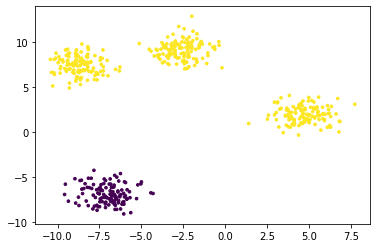

In [22]:
plt.scatter(X[:, 0], X[:, 1], s=7, c=y_pred)
plt.show()

As you must see, the KMeans has found 2 clusters as required. It's not the modeling we want. We want to find the optimal number of clusters that represents our data the best. How do we find that optimal number of clusters?

### 🧪 Test your code

In [23]:
from nbresult import ChallengeResult

result = ChallengeResult('two_means', clusters=y_pred)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/06-Unsupervised-Learning/01-Image-Compression
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_two_means.py::TestTwoMeans::test_imbalanced_clusters PASSED   [ 50%]
tests/test_two_means.py::TestTwoMeans::test_two_clusters PASSED          [100%]

============================== 2 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/two_means.pickle

git commit -m 'Completed two_means step'

git push origin master


## Find the Appropriate Number of Clusters

We can use two techniques to find the appropriate number of clusters. 

You have to know that the Kmeans also returns a property named `inertia_` that **returns the sum of squared distances of samples to their closest cluster center**. 

It can serve as an indicator to determine how much we have of **variance explained** the data by the found clusters. 

### The Elbow Method

This is a technique that is used to help us find the appropriate number of cluster in K-Means. 

This method looks at the percentage of variance explained as a function of the number of clusters: one should choose a number of clusters so that __adding another cluster doesn't give much better modeling of the data__ (the marginal gain drops, giving an angle in the graph). Hence the "elbow criterion". 

NB: This "elbow" cannot always be unambiguously identified.

👉__To do that, you want to `fit` a KMeans for every number of cluster between 1 and 10, and save the explained variance__

In [25]:
# Apply the elbow method to find the optimal number of clusters.
inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X)
    inertias.append(km_test.inertia_)

Then, you want to plot the inertias as a function of the number of clusters.

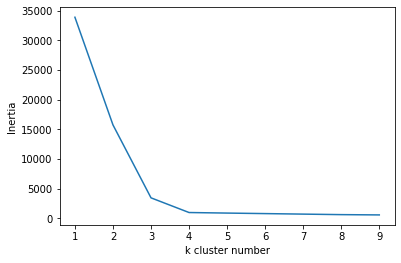

In [28]:
plt.plot(ks, inertias)
plt.xlabel('k cluster number')
plt.ylabel('Inertia')
plt.show()

In [29]:
# ====> elbow at 4

You should see an "elbow" where the inertia stops dropping dramatically at 4 (since we generated that data, we know it's the right answer 😉).

### Hierarchical Clustering

From the previous Elbow Method we can say that the optimal clusters are 4. This can also be confirmed by another statistical technique called [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

👉 Using [`scipy.cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html), **plot the dendogram linkage** of the hierarchical clustering using the 'ward' method, that minimizes the within-cluster variance. You should get 4 clusters as well. 

<br>
<details>
    <summary>💡 Solution</summary>

```python
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method='ward'))
plt.show()
```
</details>


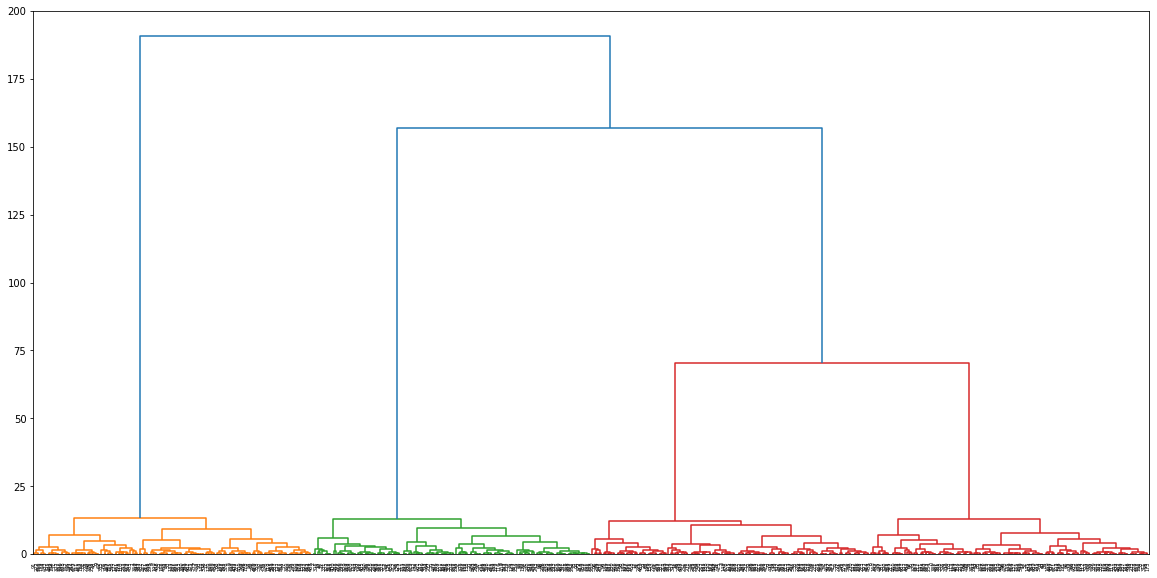

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method='ward'))
plt.show()

## Fit K-Means with 4 Optimal Clusters

Now that we have found the optimal number of clusters, we can go on and fit a KMeans with 4 clusters over our observations. Scatter plot your observations, coloring every computed class with a different color.

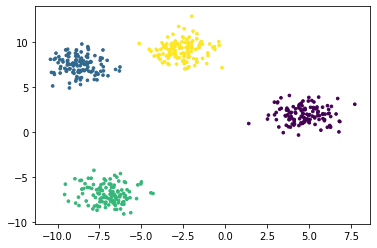

In [33]:
optimal_model = KMeans(n_clusters=4, random_state=42)
y_pred = optimal_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s=7, c=y_pred)
plt.show()

**Additional Note:** Does feature scaling always improve the clustering results? 

[Additional learning](https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering)

🏁 Well done with your first challenge! **Don't forget to push your notebook.**